![alt text](Enunciado_1.png)

![alt text](Enunciado_2.png)

[[ 2. -1.]
 [-1.  2.]]
[3. 1.]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[ 2.         -1.        ]
 [-0.91666667  1.83333333]]
[2.87771355 0.95561978]
[[ 0.75156513  0.69159369]
 [-0.6596589   0.72228677]]
[[ 2.         -1.        ]
 [-0.84615385  1.69230769]]
[2.77879659 0.9135111 ]
[[ 0.78896252  0.67721431]
 [-0.61444132  0.73578583]]
[[ 2.         -1.        ]
 [-0.78571429  1.57142857]]
[2.69765324 0.87377533]
[[ 0.82013511  0.66395998]
 [-0.57216991  0.74776811]]
[[ 2.         -1.        ]
 [-0.73333333  1.46666667]]
[2.6302416  0.83642506]
[[ 0.84599932  0.65178653]
 [-0.53318397  0.75840247]]
[[ 2.     -1.    ]
 [-0.6875  1.375 ]]
[2.57359043 0.80140957]
[[ 0.86743418  0.6406284 ]
 [-0.49755195  0.76785106]]
[[ 2.         -1.        ]
 [-0.64705882  1.29411765]]
[2.52548144 0.7686362 ]
[[ 0.88522244  0.63040917]
 [-0.46516796  0.77626302]]
[[ 2.         -1.        ]
 [-0.61111111  1.22222222]]
[2.4842352  0.73798702]
[[ 0.90003068  0.62104892]
 [-0.43582654  0.783

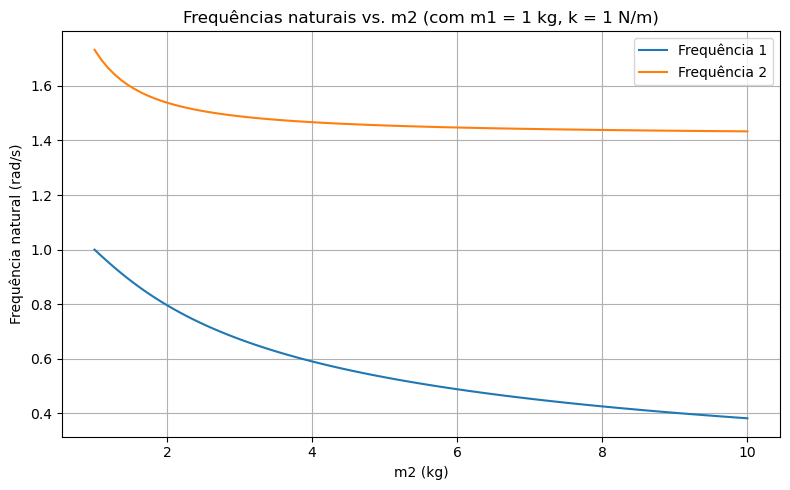

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def matriz_dinamica_2atomos(m1, m2, k):
    """Retorna a matriz dinâmica para 2 átomos com contorno periódico."""
    D = np.array([
        [(2 * k) / m1, -k / m1],
        [-k / m2, (2 * k) / m2]
    ])
    return D

def calcula_frequencias_modos(m1, m2, k):
    """Calcula frequências naturais (rad/s) e modos normais."""
    D = matriz_dinamica_2atomos(m1, m2, k)
    autovalores, autovetores = np.linalg.eig(D)
    # Ordenar por frequência crescente
    idx = np.argsort(autovalores)
    freq = np.sqrt(np.abs(autovalores[idx]))  # omega = sqrt(lambda)
    modos = autovetores[:, idx]
    print(D)
    print (autovalores)
    print(autovetores)
    return freq, modos

# Parâmetros fixos
m1 = 1.0
k = 1.0

# Variação de m2
m2_vals = np.linspace(1, 10, 100)
freqs = []

for m2 in m2_vals:
    f, _ = calcula_frequencias_modos(m1, m2, k)
    freqs.append(f)

freqs = np.array(freqs)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(m2_vals, freqs[:, 0], label='Frequência 1')
plt.plot(m2_vals, freqs[:, 1], label='Frequência 2')
plt.xlabel('m2 (kg)')
plt.ylabel('Frequência natural (rad/s)')
plt.title('Frequências naturais vs. m2 (com m1 = 1 kg, k = 1 N/m)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


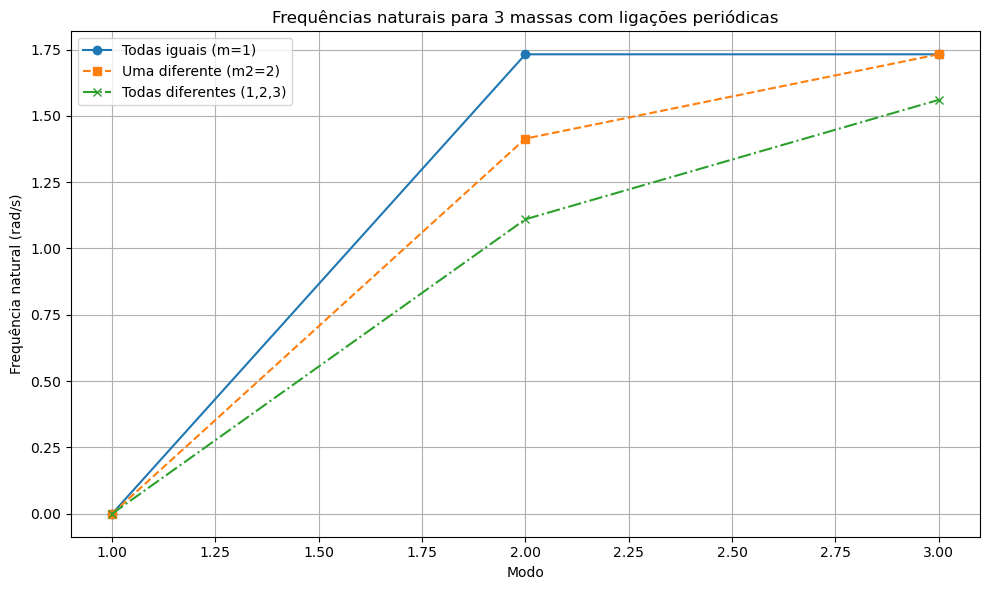

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def matriz_dinamica_3atomos(m1, m2, m3, k):
    """Retorna a matriz dinâmica para 3 massas conectadas ciclicamente."""
    D = np.array([
        [(2*k)/m1, -k/m1, -k/m1],
        [-k/m2, (2*k)/m2, -k/m2],
        [-k/m3, -k/m3, (2*k)/m3]
    ])
    return D

def calcula_frequencias_modos_3atomos(m1, m2, m3, k):
    D = matriz_dinamica_3atomos(m1, m2, m3, k)
    autovalores, autovetores = np.linalg.eig(D)
    idx = np.argsort(autovalores)
    freq = np.sqrt(np.abs(autovalores[idx]))
    modos = autovetores[:, idx]
    return freq, modos

# Exemplo 1: massas iguais
m1 = m2 = m3 = 1.0
k = 1.0
freq_eq, modos_eq = calcula_frequencias_modos_3atomos(m1, m2, m3, k)

# Exemplo 2: uma massa diferente
m1, m2, m3 = 1.0, 2.0, 1.0
freq_1dif, modos_1dif = calcula_frequencias_modos_3atomos(m1, m2, m3, k)

# Exemplo 3: todas diferentes
m1, m2, m3 = 1.0, 2.0, 3.0
freq_diff, modos_diff = calcula_frequencias_modos_3atomos(m1, m2, m3, k)

# Plot
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3], freq_eq, 'o-', label='Todas iguais (m=1)')
plt.plot([1, 2, 3], freq_1dif, 's--', label='Uma diferente (m2=2)')
plt.plot([1, 2, 3], freq_diff, 'x-.', label='Todas diferentes (1,2,3)')
plt.xlabel('Modo')
plt.ylabel('Frequência natural (rad/s)')
plt.title('Frequências naturais para 3 massas com ligações periódicas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
